<a href="https://colab.research.google.com/github/Sujoy-004/Chat-Analyzer-Pro/blob/main/notebooks/02_exploratory_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cell 1: Create Directory Structure & Load Data Properly

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")

In [18]:
try:
    # Try to load the main processed file
    df = pd.read_csv('https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv')
    data_source = 'https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv'
    print(f"✅ Loaded data from: {data_source}")
except FileNotFoundError:
    # Fallback options
    try:
        df = pd.read_csv('data/processed/telegram_parsed.csv')
        data_source = 'data/processed/telegram_parsed.csv'
        print(f"✅ Loaded data from: {data_source}")
    except FileNotFoundError:
        print("❌ No processed data found!")
        print("Please ensure you have:")
        print("  - data/processed/example_parsed.csv, or")
        print("  - data/processed/telegram_parsed.csv")
        raise FileNotFoundError("No processed chat data available")

✅ Loaded data from: https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv


In [19]:
# Display initial data info
print(f"\n📊 Initial Data Overview:")
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Data source: {data_source}")

print(f"\nFirst 3 rows:")
print(df.head(3).to_string())

print(f"\nData types:")
print(df.dtypes)


📊 Initial Data Overview:
Shape: (27, 7)
Columns: ['datetime', 'sender', 'message', 'date', 'time', 'hour', 'message_length']
Data source: https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/data/processed/example_parsed.csv

First 3 rows:
              datetime sender                                                                    message        date      time  hour  message_length
0  2023-12-25 09:30:00  Alice                                                        Merry Christmas! 🎄🎅  2023-12-25  09:30:00     9              19
1  2023-12-25 09:32:00    Bob                 Merry Christmas to you too! Hope you're having a great day  2023-12-25  09:32:00     9              58
2  2023-12-25 09:35:00  Alice  Thanks! Opening presents with family right now Family time is the best ❤️  2023-12-25  09:35:00     9              73

Data types:
datetime          object
sender            object
message           object
date              object
time              object


In [20]:
def categorize_time_period(hour):
    """Categorize hour into time periods"""
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

In [21]:
# Prepare and enhance the data for EDA
print("\n🔧 Preparing data for EDA...")

# Convert datetime columns to proper datetime objects
df['datetime'] = pd.to_datetime(df['datetime'])
df['date'] = pd.to_datetime(df['date']).dt.date

# Add additional time-based features
df['day_of_week'] = df['datetime'].dt.day_name()
df['month'] = df['datetime'].dt.month_name()
df['weekday'] = df['datetime'].dt.weekday  # 0=Monday, 6=Sunday
df['is_weekend'] = df['weekday'] >= 5

# Time periods
df['time_period'] = df['hour'].apply(categorize_time_period)

# Message features
df['word_count'] = df['message'].str.split().str.len()
df['is_media'] = df['message'].str.contains('<Media omitted>', case=False, na=False)
df['has_emoji'] = df['message'].str.contains(r'[😀-🙏🌀-🗿]', regex=True, na=False)

print(f"✅ Data enhanced! New shape: {df.shape}")
print(f"Added columns: day_of_week, month, weekday, is_weekend, time_period, word_count, is_media, has_emoji")


🔧 Preparing data for EDA...
✅ Data enhanced! New shape: (27, 15)
Added columns: day_of_week, month, weekday, is_weekend, time_period, word_count, is_media, has_emoji


In [22]:
# Time range calculations
date_range_days = (df['datetime'].max() - df['datetime'].min()).days + 1

# Basic stats
total_messages = len(df)
unique_participants = df['sender'].nunique()
participants = df['sender'].unique().tolist()
start_date = df['datetime'].min().strftime('%Y-%m-%d')
end_date = df['datetime'].max().strftime('%Y-%m-%d')
messages_per_day = total_messages / date_range_days
total_words = df['word_count'].sum()
total_characters = df['message_length'].sum()
avg_message_length = df['message_length'].mean()
avg_words_per_message = df['word_count'].mean()
media_messages = df['is_media'].sum()
emoji_messages = df['has_emoji'].sum()

In [23]:
participant_stats = {}
for participant in participants:
    p_data = df[df['sender'] == participant]
    participant_stats[participant] = {
        'message_count': len(p_data),
        'message_percentage': (len(p_data) / total_messages) * 100,
        'avg_message_length': p_data['message_length'].mean(),
        'total_words': p_data['word_count'].sum(),
        'media_messages': p_data['is_media'].sum(),
        'emoji_usage': p_data['has_emoji'].sum(),
    }

In [25]:
print(f"📅 Duration: {start_date} to {end_date} ({date_range_days} days)")
print(f"💬 Total Messages: {total_messages:,}")
print(f"👥 Participants: {unique_participants} ({', '.join(participants)})")
print(f"📊 Daily Average: {messages_per_day:.1f} messages/day")
print(f"📝 Total Words: {total_words:,}")
print(f"💭 Avg Message Length: {avg_message_length:.1f} characters")
print(f"📖 Avg Words per Message: {avg_words_per_message:.1f}")
print(f"📱 Media Messages: {media_messages} ({(media_messages/total_messages*100):.1f}%)")
print(f"😊 Messages with Emojis: {emoji_messages} ({(emoji_messages/total_messages*100):.1f}%)")

print(f"\n👥 PER PARTICIPANT BREAKDOWN:")
for participant, p_stats in participant_stats.items():
    print(f"\n  📍 {participant}:")
    print(f"    Messages: {p_stats['message_count']} ({p_stats['message_percentage']:.1f}%)")
    print(f"    Avg Length: {p_stats['avg_message_length']:.1f} chars")
    print(f"    Total Words: {p_stats['total_words']:,}")
    print(f"    Media: {p_stats['media_messages']}, Emojis: {p_stats['emoji_usage']}")

# Show sample of enhanced data
print(f"\n🔍 ENHANCED DATA SAMPLE:")
print(df[['datetime', 'sender', 'day_of_week', 'time_period', 'word_count', 'is_media', 'has_emoji']].head().to_string())

📅 Duration: 2023-12-25 to 2023-12-27 (2 days)
💬 Total Messages: 27
👥 Participants: 2 (Alice, Bob)
📊 Daily Average: 13.5 messages/day
📝 Total Words: 182
💭 Avg Message Length: 37.8 characters
📖 Avg Words per Message: 6.7
📱 Media Messages: 2 (7.4%)
😊 Messages with Emojis: 8 (29.6%)

👥 PER PARTICIPANT BREAKDOWN:

  📍 Alice:
    Messages: 14 (51.9%)
    Avg Length: 37.1 chars
    Total Words: 91
    Media: 1, Emojis: 5

  📍 Bob:
    Messages: 13 (48.1%)
    Avg Length: 38.6 chars
    Total Words: 91
    Media: 1, Emojis: 3

🔍 ENHANCED DATA SAMPLE:
             datetime sender day_of_week time_period  word_count  is_media  has_emoji
0 2023-12-25 09:30:00  Alice      Monday     Morning           3     False       True
1 2023-12-25 09:32:00    Bob      Monday     Morning          11     False      False
2 2023-12-25 09:35:00  Alice      Monday     Morning          13     False      False
3 2023-12-25 10:15:00    Bob      Monday     Morning           9     False      False
4 2023-12-25 10:16:00

## Cell 2: Message Volume and Activity Pattern Analysis

📅 Analyzing daily message patterns...
⏰ Creating hourly activity patterns...
🌅 Analyzing time period preferences...
👥 Analyzing participant activity...
📏 Analyzing message length patterns...
📆 Analyzing day-of-week patterns...


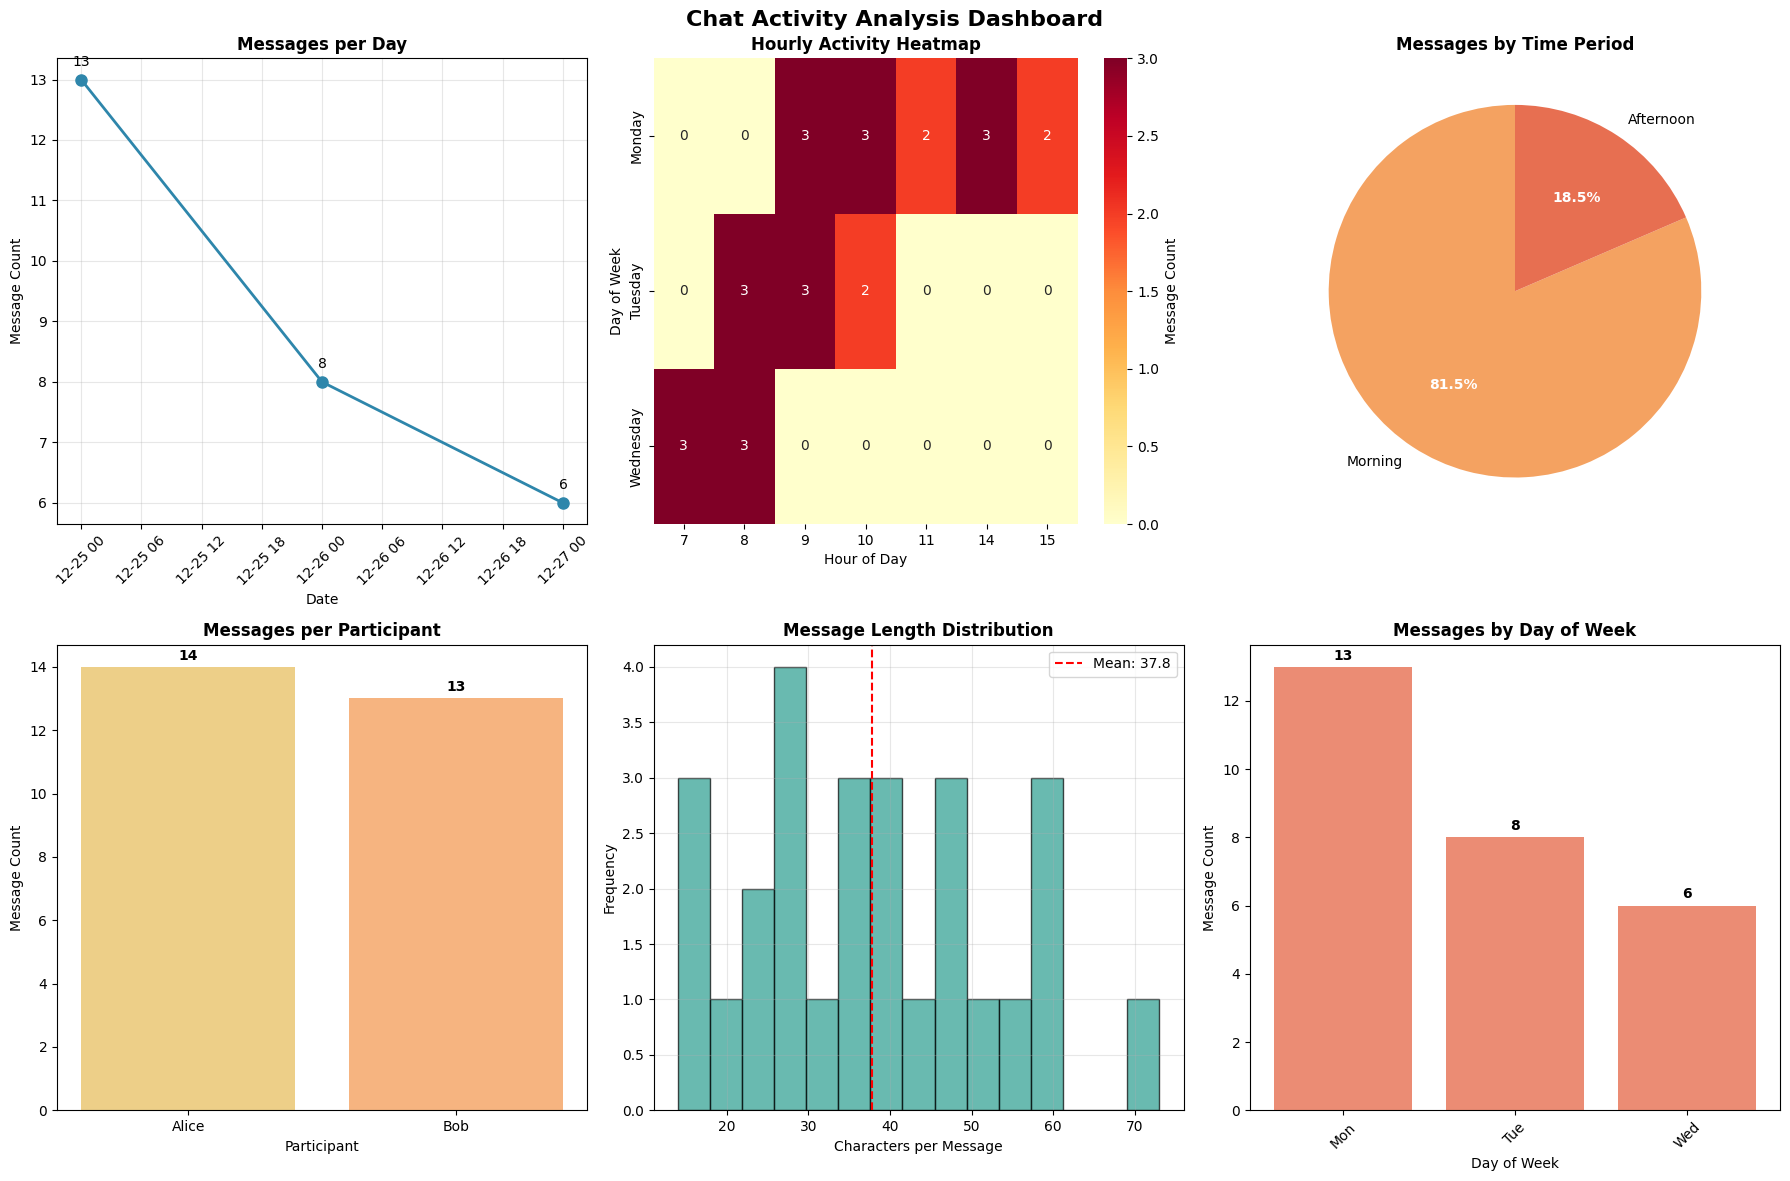


🔍 ACTIVITY PATTERN INSIGHTS
📅 Most Active Day: 2023-12-25 (13 messages)
⏰ Peak Hour: 8:00 (6 messages)
🌅 Most Active Period: Morning (81.5% of all messages)
📏 Longest Message: 73 chars by Alice
📏 Shortest Message: 14 chars by Bob
📊 Media Usage: 2 messages (7.4%)
😊 Emoji Usage: 8 messages (29.6%)

✅ Message volume analysis complete! Ready for next analysis...


In [40]:
# Create a comprehensive visualization dashboard
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Chat Activity Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Messages per day
print("📅 Analyzing daily message patterns...")
daily_messages = df.groupby('date').size().reset_index(name='message_count')
daily_messages['date'] = pd.to_datetime(daily_messages['date'])

axes[0, 0].plot(daily_messages['date'], daily_messages['message_count'],
                marker='o', linewidth=2, markersize=8, color='#2E86AB')
axes[0, 0].set_title('Messages per Day', fontweight='bold')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Message Count')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].tick_params(axis='x', rotation=45)

# Add values on points
for i, row in daily_messages.iterrows():
    axes[0, 0].annotate(f"{row['message_count']}", (row['date'], row['message_count']), textcoords="offset points", xytext=(0,10), ha='center')

# 2. Hourly activity heatmap
print("⏰ Creating hourly activity patterns...")
hourly_activity = df.groupby(['day_of_week', 'hour']).size().unstack(fill_value=0)

# Reorder days properly
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hourly_activity = hourly_activity.reindex([day for day in day_order if day in hourly_activity.index])

sns.heatmap(hourly_activity, annot=True, fmt='d', cmap='YlOrRd',
            ax=axes[0, 1], cbar_kws={'label': 'Message Count'})
axes[0, 1].set_title('Hourly Activity Heatmap', fontweight='bold')
axes[0, 1].set_xlabel('Hour of Day')
axes[0, 1].set_ylabel('Day of Week')

# 3. Messages by time period
print("🌅 Analyzing time period preferences...")
time_period_counts = df['time_period'].value_counts()
colors = ['#F4A261', '#E76F51', '#2A9D8F', '#264653']

wedges, texts, autotexts = axes[0, 2].pie(time_period_counts.values, labels=time_period_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
axes[0, 2].set_title('Messages by Time Period', fontweight='bold')

# Make percentage text bold
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontweight('bold')

# 4. Sender message distribution
print("👥 Analyzing participant activity...")
sender_counts = df['sender'].value_counts()
bars = axes[1, 0].bar(sender_counts.index, sender_counts.values, color=['#E9C46A', '#F4A261'], alpha=0.8)
axes[1, 0].set_title('Messages per Participant', fontweight='bold')
axes[1, 0].set_xlabel('Participant')
axes[1, 0].set_ylabel('Message Count')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    axes[1, 0].annotate(f'{int(height)}',
                       xy=(bar.get_x() + bar.get_width() / 2, height),
                       xytext=(0, 3), textcoords="offset points",
                       ha='center', va='bottom', fontweight='bold')

# 5. Message length distribution
print("📏 Analyzing message length patterns...")
axes[1, 1].hist(df['message_length'], bins=15, alpha=0.7, color='#2A9D8F', edgecolor='black')
axes[1, 1].axvline(df['message_length'].mean(), color='red', linestyle='--', label=f'Mean: {df["message_length"].mean():.1f}')
axes[1, 1].set_title('Message Length Distribution', fontweight='bold')
axes[1, 1].set_xlabel('Characters per Message')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

# 6. Activity by day of week
print("📆 Analyzing day-of-week patterns...")
day_activity = df['day_of_week'].value_counts()
day_order_available = [day for day in day_order if day in day_activity.index]
day_activity_ordered = day_activity.reindex(day_order_available)

bars = axes[1, 2].bar(range(len(day_activity_ordered)), day_activity_ordered.values, color='#E76F51', alpha=0.8)
axes[1, 2].set_title('Messages by Day of Week', fontweight='bold')
axes[1, 2].set_xlabel('Day of Week')
axes[1, 2].set_ylabel('Message Count')
axes[1, 2].set_xticks(range(len(day_activity_ordered)))
axes[1, 2].set_xticklabels([day[:3] for day in day_activity_ordered.index], rotation=45)

# Add value labels
for i, bar in enumerate(bars):
    height = bar.get_height()
    axes[1, 2].annotate(f'{int(height)}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

# Generate detailed insights
print("\n" + "="*60)
print("🔍 ACTIVITY PATTERN INSIGHTS")
print("="*60)

# Daily patterns
most_active_day = daily_messages.loc[daily_messages['message_count'].idxmax()]
print(f"📅 Most Active Day: {most_active_day['date'].strftime('%Y-%m-%d')} ({most_active_day['message_count']} messages)")

# Hourly patterns
hourly_totals = df.groupby('hour').size()
peak_hour = hourly_totals.idxmax()
peak_count = hourly_totals.max()
print(f"⏰ Peak Hour: {peak_hour}:00 ({peak_count} messages)")

# Time period preferences
most_active_period = time_period_counts.idxmax()
period_percentage = (time_period_counts.max() / len(df)) * 100
print(f"🌅 Most Active Period: {most_active_period} ({period_percentage:.1f}% of all messages)")

# Weekend vs Weekday
weekend_msgs = df[df['is_weekend']].shape[0]
weekday_msgs = df[~df['is_weekend']].shape[0]
if weekend_msgs > 0 and weekday_msgs > 0:
    weekend_ratio = weekend_msgs / (weekend_msgs + weekday_msgs) * 100
    print(f"🏖️ Weekend Activity: {weekend_msgs} messages ({weekend_ratio:.1f}%)")
    print(f"💼 Weekday Activity: {weekday_msgs} messages ({100-weekend_ratio:.1f}%)")

# Message characteristics
longest_msg_idx = df['message_length'].idxmax()
longest_msg = df.loc[longest_msg_idx]
print(f"📏 Longest Message: {longest_msg['message_length']} chars by {longest_msg['sender']}")

shortest_msg_idx = df[df['message_length'] > 0]['message_length'].idxmin()
shortest_msg = df.loc[shortest_msg_idx]
print(f"📏 Shortest Message: {shortest_msg['message_length']} chars by {shortest_msg['sender']}")

print(f"📊 Media Usage: {media_messages} messages ({(media_messages/total_messages*100):.1f}%)")
print(f"😊 Emoji Usage: {emoji_messages} messages ({(emoji_messages/total_messages*100):.1f}%)")

print(f"\n✅ Message volume analysis complete! Ready for next analysis...")

## Cell 3 : Conversation Dynamics and Response Pattern Analysis

In [41]:
def calculate_response_times(df):
    df_sorted = df.sort_values('datetime').reset_index(drop=True)
    response_times = []
    response_data = []

    for i in range(1, len(df_sorted)):
        current_msg = df_sorted.iloc[i]
        prev_msg = df_sorted.iloc[i-1]

        # Only calculate if different senders (actual response)
        if current_msg['sender'] != prev_msg['sender']:
            time_diff = current_msg['datetime'] - prev_msg['datetime']
            minutes_diff = time_diff.total_seconds() / 60

            response_times.append(minutes_diff)
            response_data.append({
                'responder': current_msg['sender'],
                'initiator': prev_msg['sender'],
                'response_time_minutes': minutes_diff,
                'response_time_seconds': time_diff.total_seconds(),
                'prev_message': prev_msg['message'][:50] + "..." if len(prev_msg['message']) > 50 else prev_msg['message'],
                'response_message': current_msg['message'][:50] + "..." if len(current_msg['message']) > 50 else current_msg['message']
            })

    return response_times, response_data

In [42]:
def analyze_conversation_flow(df):
    """Analyze conversation initiation and flow patterns"""
    df_sorted = df.sort_values('datetime').reset_index(drop=True)

    # Find conversation starters (after gaps of 30+ minutes)
    conversation_starters = []
    prev_time = None

    for i, row in df_sorted.iterrows():
        if prev_time is None:
            # First message
            conversation_starters.append(row['sender'])
        else:
            time_gap = (row['datetime'] - prev_time).total_seconds() / 60
            if time_gap > 30:  # 30+ minute gap = new conversation
                conversation_starters.append(row['sender'])
        prev_time = row['datetime']

    return conversation_starters

⏱️ Calculating response times...
🚀 Analyzing conversation flow...
📊 Creating response time visualizations...


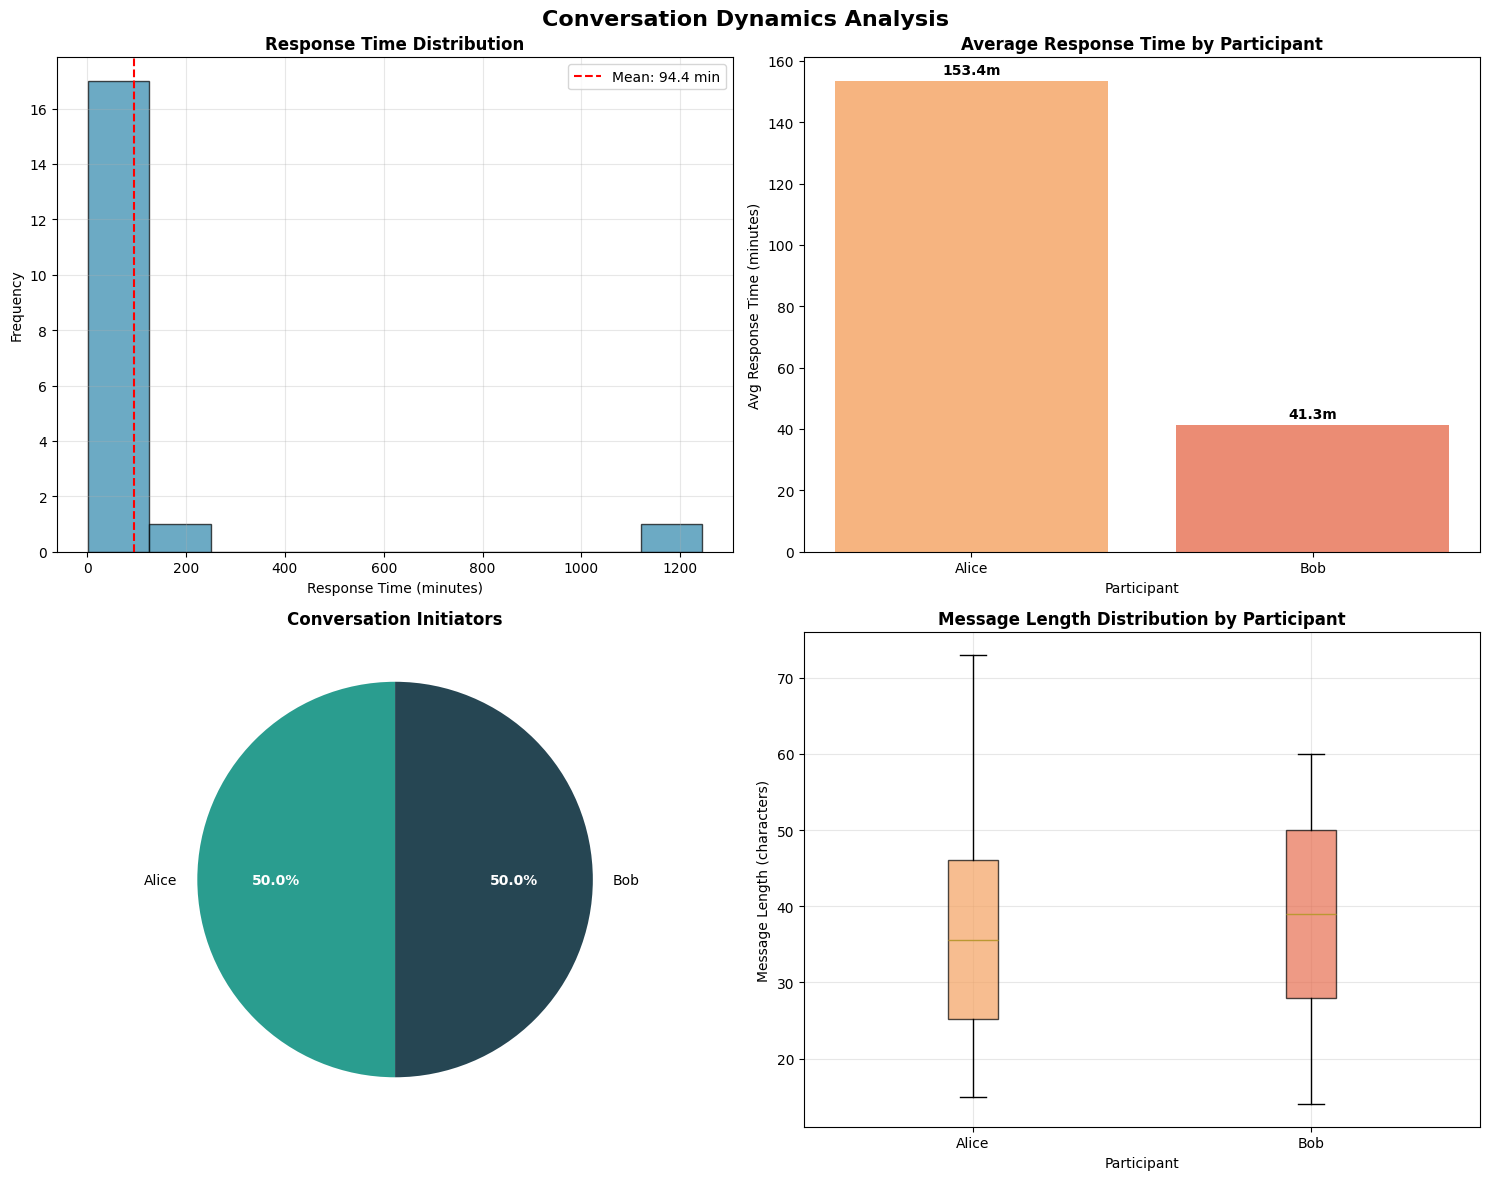


💬 CONVERSATION DYNAMICS INSIGHTS
⏱️ RESPONSE TIME ANALYSIS:
   Average Response Time: 94.4 minutes
   Median Response Time: 29.0 minutes
   Fastest Response: 1.0 minutes
   Slowest Response: 1245.0 minutes

👥 INDIVIDUAL RESPONSE PATTERNS:
   Bob: Avg 41.3min, Responses: 10
   Alice: Avg 153.4min, Responses: 9

🚀 CONVERSATION INITIATION:
   Total Conversations Started: 6
   Alice: 3 conversations (50.0%)
   Bob: 3 conversations (50.0%)

📝 MESSAGE CHARACTERISTICS:
   Alice:
     Avg message length: 37.1 characters
     Avg words per message: 6.5
     Media messages: 1
     Messages with emojis: 5
   Bob:
     Avg message length: 38.6 characters
     Avg words per message: 7.0
     Media messages: 1
     Messages with emojis: 3

⚖️ CONVERSATION BALANCE:
   Balance Ratio: 0.93 (1.0 = perfectly balanced)
   Status: Well-balanced conversation 👍

✅ Conversation dynamics analysis complete!


In [44]:
# Calculate response times and patterns
print("⏱️ Calculating response times...")
response_times, response_data = calculate_response_times(df)
response_df = pd.DataFrame(response_data)

print("🚀 Analyzing conversation flow...")
conversation_starters = analyze_conversation_flow(df)

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Conversation Dynamics Analysis', fontsize=16, fontweight='bold')

# 1. Response Time Distribution
if response_times:
    print("📊 Creating response time visualizations...")
    axes[0, 0].hist(response_times, bins=10, alpha=0.7, color='#2E86AB', edgecolor='black')
    axes[0, 0].axvline(np.mean(response_times), color='red', linestyle='--', label=f'Mean: {np.mean(response_times):.1f} min')
    axes[0, 0].set_title('Response Time Distribution', fontweight='bold')
    axes[0, 0].set_xlabel('Response Time (minutes)')
    axes[0, 0].set_ylabel('Frequency')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
else:
    axes[0, 0].text(0.5, 0.5, 'No Response Data\n(Single participant)', ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=12)
    axes[0, 0].set_title('Response Time Distribution', fontweight='bold')

# 2. Response Times by Participant
if not response_df.empty:
    response_by_person = response_df.groupby('responder')['response_time_minutes'].agg(['mean', 'count'])

    bars = axes[0, 1].bar(response_by_person.index, response_by_person['mean'], color=['#F4A261', '#E76F51'], alpha=0.8)
    axes[0, 1].set_title('Average Response Time by Participant', fontweight='bold')
    axes[0, 1].set_xlabel('Participant')
    axes[0, 1].set_ylabel('Avg Response Time (minutes)')

    # Add value labels
    for bar, mean_time in zip(bars, response_by_person['mean']):
        height = bar.get_height()
        axes[0, 1].annotate(f'{mean_time:.1f}m', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')
else:
    axes[0, 1].text(0.5, 0.5, 'No Response Data\nAvailable', ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12)
    axes[0, 1].set_title('Average Response Time by Participant', fontweight='bold')

# 3. Conversation Starters
if conversation_starters:
    starter_counts = pd.Series(conversation_starters).value_counts()
    colors = ['#2A9D8F', '#264653', '#E9C46A'][:len(starter_counts)]

    wedges, texts, autotexts = axes[1, 0].pie(starter_counts.values, labels=starter_counts.index, autopct='%1.1f%%', startangle=90, colors=colors)
    axes[1, 0].set_title('Conversation Initiators', fontweight='bold')

    # Bold percentage text
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
else:
    axes[1, 0].text(0.5, 0.5, 'No Conversation\nStarter Data', ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
    axes[1, 0].set_title('Conversation Initiators', fontweight='bold')

# 4. Message Length by Participant
participants = df['sender'].unique()
message_lengths = [df[df['sender'] == p]['message_length'].values for p in participants]
colors_box = ['#F4A261', '#E76F51']

box_plot = axes[1, 1].boxplot(message_lengths, labels=participants, patch_artist=True)
for patch, color in zip(box_plot['boxes'], colors_box[:len(participants)]):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

axes[1, 1].set_title('Message Length Distribution by Participant', fontweight='bold')
axes[1, 1].set_xlabel('Participant')
axes[1, 1].set_ylabel('Message Length (characters)')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Generate detailed conversation insights
print("\n" + "="*60)
print("💬 CONVERSATION DYNAMICS INSIGHTS")
print("="*60)

# Response time analysis
if response_times:
    avg_response = np.mean(response_times)
    median_response = np.median(response_times)
    fastest_response = min(response_times)
    slowest_response = max(response_times)

    print(f"⏱️ RESPONSE TIME ANALYSIS:")
    print(f"   Average Response Time: {avg_response:.1f} minutes")
    print(f"   Median Response Time: {median_response:.1f} minutes")
    print(f"   Fastest Response: {fastest_response:.1f} minutes")
    print(f"   Slowest Response: {slowest_response:.1f} minutes")

    # Individual response patterns
    if not response_df.empty:
        print(f"\n👥 INDIVIDUAL RESPONSE PATTERNS:")
        for participant in response_df['responder'].unique():
            p_responses = response_df[response_df['responder'] == participant]['response_time_minutes']
            print(f"   {participant}: Avg {p_responses.mean():.1f}min, "
                  f"Responses: {len(p_responses)}")
else:
    print("⏱️ No response time data available (insufficient conversation turns)")

# Conversation initiation analysis
if conversation_starters:
    starter_counts = pd.Series(conversation_starters).value_counts()
    total_conversations = len(conversation_starters)

    print(f"\n🚀 CONVERSATION INITIATION:")
    print(f"   Total Conversations Started: {total_conversations}")
    for participant, count in starter_counts.items():
        percentage = (count / total_conversations) * 100
        print(f"   {participant}: {count} conversations ({percentage:.1f}%)")

# Message patterns
print(f"\n📝 MESSAGE CHARACTERISTICS:")
for participant in participants:
    p_data = df[df['sender'] == participant]
    avg_length = p_data['message_length'].mean()
    avg_words = p_data['word_count'].mean()
    media_count = p_data['is_media'].sum()
    emoji_count = p_data['has_emoji'].sum()

    print(f"   {participant}:")
    print(f"     Avg message length: {avg_length:.1f} characters")
    print(f"     Avg words per message: {avg_words:.1f}")
    print(f"     Media messages: {media_count}")
    print(f"     Messages with emojis: {emoji_count}")

# Conversation balance
if len(participants) == 2:
    p1, p2 = participants[0], participants[1]
    p1_msgs = len(df[df['sender'] == p1])
    p2_msgs = len(df[df['sender'] == p2])
    balance_ratio = min(p1_msgs, p2_msgs) / max(p1_msgs, p2_msgs)

    print(f"\n⚖️ CONVERSATION BALANCE:")
    print(f"   Balance Ratio: {balance_ratio:.2f} (1.0 = perfectly balanced)")
    if balance_ratio > 0.8:
        print(f"   Status: Well-balanced conversation 👍")
    elif balance_ratio > 0.6:
        print(f"   Status: Moderately balanced conversation")
    else:
        print(f"   Status: Imbalanced conversation - one person dominates")

print(f"\n✅ Conversation dynamics analysis complete!")


## Cell 4 : Content Analysis and Word Pattern Analysis

In [45]:
import re
from collections import Counter
import string

In [46]:
def clean_text_for_analysis(text):
    """Clean text for word analysis"""
    if pd.isna(text) or text == '<Media omitted>':
        return ""

    # Convert to lowercase and remove punctuation
    text = text.lower()
    # Remove punctuation but keep emojis
    text = re.sub(r'[^\w\s\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF]', ' ', text)
    # Remove extra whitespace
    text = ' '.join(text.split())
    return text

In [47]:
def extract_emojis(text):
    """Extract emojis from text"""
    if pd.isna(text):
        return []
    emoji_pattern = re.compile(r'[\U0001F600-\U0001F64F\U0001F300-\U0001F5FF\U0001F680-\U0001F6FF\U0001F1E0-\U0001F1FF\U00002702-\U000027B0\U000024C2-\U0001F251]+')
    return emoji_pattern.findall(text)

In [48]:
def get_word_frequency(df, participant=None):
    """Get word frequency for all or specific participant"""
    if participant:
        messages = df[df['sender'] == participant]['message']
    else:
        messages = df['message']

    # Combine all messages and clean
    all_text = ' '.join(messages.apply(clean_text_for_analysis))

    # Split into words and filter out short words and common stop words
    words = all_text.split()
    stop_words = {'the', 'a', 'an', 'and', 'or', 'but', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'can', 'cant', 'im', 'youre', 'its', 'thats', 'dont', 'wont', 'isnt', 'arent', 'wasnt', 'werent'}

    filtered_words = [word for word in words if len(word) > 2 and word not in stop_words and not word.isdigit()]

    return Counter(filtered_words)

In [49]:
# Get word frequencies
all_word_freq = get_word_frequency(df)
participant_word_freq = {}
for participant in df['sender'].unique():
    participant_word_freq[participant] = get_word_frequency(df, participant)

# Extract emojis
print("😊 Analyzing emoji usage...")
all_emojis = []
participant_emojis = {}

for participant in df['sender'].unique():
    participant_emojis[participant] = []

for _, row in df.iterrows():
    emojis = extract_emojis(row['message'])
    all_emojis.extend(emojis)
    participant_emojis[row['sender']].extend(emojis)

emoji_freq = Counter(all_emojis)

😊 Analyzing emoji usage...


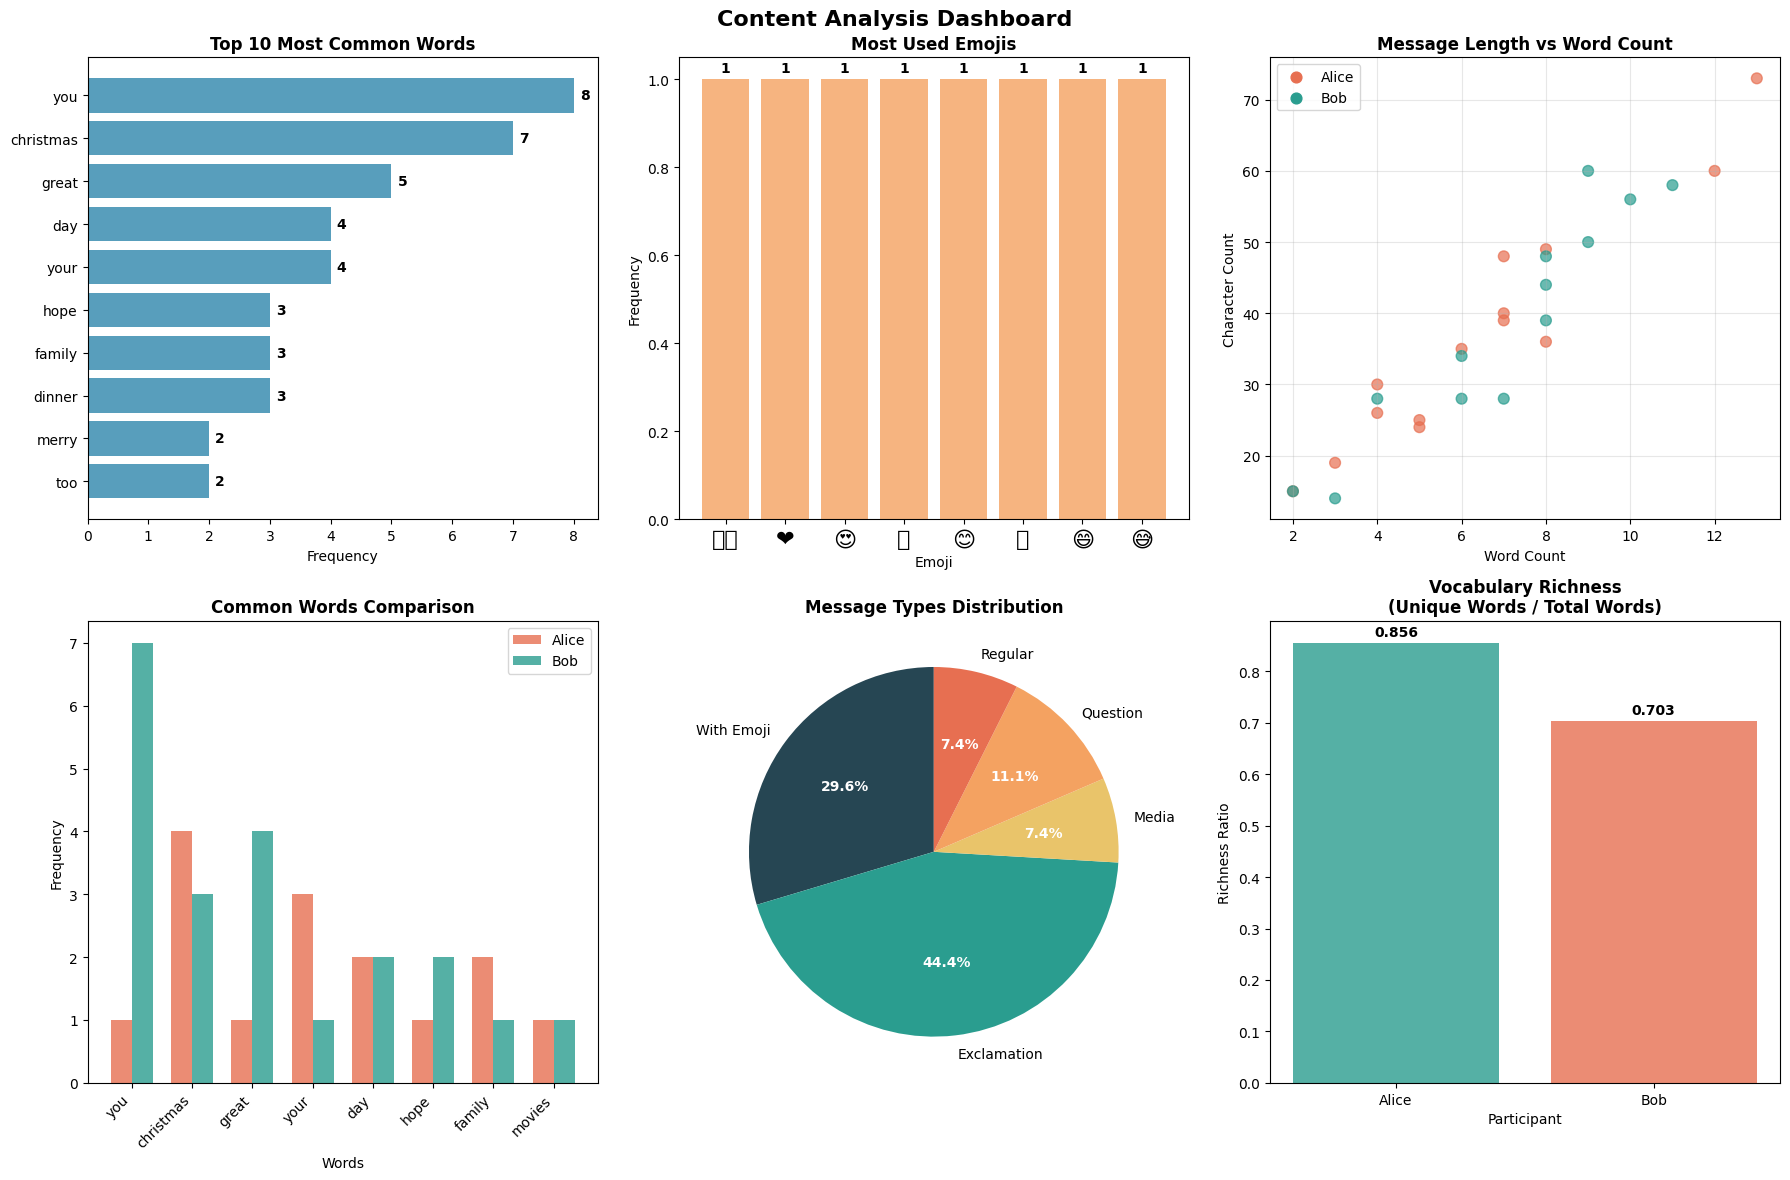

🔤 VOCABULARY ANALYSIS:
   Total unique words: 86
   Most common word: 'you' (8 times)

   Top 10 words: you, christmas, great, day, your, hope, family, dinner, merry, too

😊 EMOJI ANALYSIS:
   Total emoji instances: 9
   Unique emojis used: 9
   Most used emoji: 🎄🎅 (1 times)
   Alice: 6 emojis, 6 unique
   Bob: 3 emojis, 3 unique

📚 VOCABULARY RICHNESS:
   Alice:
     Total words: 90
     Unique words: 77
     Richness ratio: 0.856
   Bob:
     Total words: 91
     Unique words: 64
     Richness ratio: 0.703

💬 MESSAGE CHARACTERISTICS:
   Exclamation: 12 messages (44.4%)
   With Emoji: 8 messages (29.6%)
   Question: 3 messages (11.1%)
   Media: 2 messages (7.4%)
   Regular: 2 messages (7.4%)


In [50]:
# Create visualizations
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Content Analysis Dashboard', fontsize=16, fontweight='bold')

# 1. Most Common Words (Overall)
if all_word_freq:
    top_words = dict(all_word_freq.most_common(10))
    axes[0, 0].barh(list(top_words.keys())[::-1], list(top_words.values())[::-1], color='#2E86AB', alpha=0.8)
    axes[0, 0].set_title('Top 10 Most Common Words', fontweight='bold')
    axes[0, 0].set_xlabel('Frequency')

    # Add value labels
    for i, (word, count) in enumerate(reversed(list(top_words.items()))):
        axes[0, 0].text(count + 0.1, i, str(count), va='center', fontweight='bold')
else:
    axes[0, 0].text(0.5, 0.5, 'No Word Data\nAvailable', ha='center', va='center', transform=axes[0, 0].transAxes, fontsize=12)
    axes[0, 0].set_title('Top 10 Most Common Words', fontweight='bold')

# 2. Emoji Usage
if emoji_freq:
    top_emojis = dict(emoji_freq.most_common(8))
    emoji_labels = list(top_emojis.keys())
    emoji_counts = list(top_emojis.values())

    bars = axes[0, 1].bar(range(len(emoji_labels)), emoji_counts, color='#F4A261', alpha=0.8)
    axes[0, 1].set_title('Most Used Emojis', fontweight='bold')
    axes[0, 1].set_xlabel('Emoji')
    axes[0, 1].set_ylabel('Frequency')
    axes[0, 1].set_xticks(range(len(emoji_labels)))
    axes[0, 1].set_xticklabels(emoji_labels, fontsize=16)

    # Add value labels
    for bar, count in zip(bars, emoji_counts):
        height = bar.get_height()
        axes[0, 1].annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')
else:
    axes[0, 1].text(0.5, 0.5, 'No Emoji Data\nFound', ha='center', va='center', transform=axes[0, 1].transAxes, fontsize=12)
    axes[0, 1].set_title('Most Used Emojis', fontweight='bold')

# 3. Message Length vs Word Count Scatter
axes[0, 2].scatter(df['word_count'], df['message_length'], c=[['#E76F51', '#2A9D8F'][i] for i in pd.factorize(df['sender'])[0]], alpha=0.7, s=60)
axes[0, 2].set_title('Message Length vs Word Count', fontweight='bold')
axes[0, 2].set_xlabel('Word Count')
axes[0, 2].set_ylabel('Character Count')
axes[0, 2].grid(True, alpha=0.3)

# Add legend for participants
for i, participant in enumerate(df['sender'].unique()):
    axes[0, 2].scatter([], [], c=[['#E76F51', '#2A9D8F'][i]], label=participant, s=60)
axes[0, 2].legend()

# 4. Word Frequency Comparison (if 2 participants)
participants = df['sender'].unique()
if len(participants) == 2:
    p1, p2 = participants[0], participants[1]
    p1_words = participant_word_freq[p1]
    p2_words = participant_word_freq[p2]

    # Get common words
    common_words = set(p1_words.keys()) & set(p2_words.keys())
    if common_words:
        # Take top common words
        common_word_pairs = [(word, p1_words[word], p2_words[word])
                           for word in common_words]
        # Sort by total frequency
        common_word_pairs.sort(key=lambda x: x[1] + x[2], reverse=True)
        common_word_pairs = common_word_pairs[:8]  # Top 8

        words = [pair[0] for pair in common_word_pairs]
        p1_counts = [pair[1] for pair in common_word_pairs]
        p2_counts = [pair[2] for pair in common_word_pairs]

        x = np.arange(len(words))
        width = 0.35

        axes[1, 0].bar(x - width/2, p1_counts, width, label=p1, color='#E76F51', alpha=0.8)
        axes[1, 0].bar(x + width/2, p2_counts, width, label=p2, color='#2A9D8F', alpha=0.8)

        axes[1, 0].set_title('Common Words Comparison', fontweight='bold')
        axes[1, 0].set_xlabel('Words')
        axes[1, 0].set_ylabel('Frequency')
        axes[1, 0].set_xticks(x)
        axes[1, 0].set_xticklabels(words, rotation=45, ha='right')
        axes[1, 0].legend()
    else:
        axes[1, 0].text(0.5, 0.5, 'No Common\nWords Found', ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
        axes[1, 0].set_title('Common Words Comparison', fontweight='bold')
else:
    axes[1, 0].text(0.5, 0.5, 'Need 2 Participants\nfor Comparison', ha='center', va='center', transform=axes[1, 0].transAxes, fontsize=12)
    axes[1, 0].set_title('Common Words Comparison', fontweight='bold')

# 5. Message Types Distribution
message_types = []
for _, row in df.iterrows():
    msg = row['message'].lower()
    if row['is_media']:
        message_types.append('Media')
    elif '?' in row['message']:
        message_types.append('Question')
    elif '!' in row['message'] and not row['has_emoji']:
        message_types.append('Exclamation')
    elif row['has_emoji']:
        message_types.append('With Emoji')
    elif len(row['message']) < 20:
        message_types.append('Short')
    else:
        message_types.append('Regular')

type_counts = Counter(message_types)
colors = ['#264653', '#2A9D8F', '#E9C46A', '#F4A261', '#E76F51', '#C44E52']

if type_counts:
    wedges, texts, autotexts = axes[1, 1].pie(type_counts.values(), labels=type_counts.keys(), autopct='%1.1f%%', startangle=90, colors=colors[:len(type_counts)])
    axes[1, 1].set_title('Message Types Distribution', fontweight='bold')

    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
else:
    axes[1, 1].text(0.5, 0.5, 'No Message Type\nData Available', ha='center', va='center', transform=axes[1, 1].transAxes, fontsize=12)
    axes[1, 1].set_title('Message Types Distribution', fontweight='bold')

# 6. Vocabulary Richness
vocab_richness = {}
for participant in participants:
    p_messages = df[df['sender'] == participant]['message']
    total_words = sum(len(clean_text_for_analysis(msg).split()) for msg in p_messages)
    unique_words = len(set(' '.join(p_messages.apply(clean_text_for_analysis)).split()))

    if total_words > 0:
        richness = unique_words / total_words
        vocab_richness[participant] = {
            'total_words': total_words,
            'unique_words': unique_words,
            'richness_ratio': richness
        }

if vocab_richness:
    participants_list = list(vocab_richness.keys())
    richness_scores = [vocab_richness[p]['richness_ratio'] for p in participants_list]

    bars = axes[1, 2].bar(participants_list, richness_scores, color=['#2A9D8F', '#E76F51'], alpha=0.8)
    axes[1, 2].set_title('Vocabulary Richness\n(Unique Words / Total Words)', fontweight='bold')
    axes[1, 2].set_xlabel('Participant')
    axes[1, 2].set_ylabel('Richness Ratio')

    # Add value labels
    for bar, score in zip(bars, richness_scores):
        height = bar.get_height()
        axes[1, 2].annotate(f'{score:.3f}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontweight='bold')
else:
    axes[1, 2].text(0.5, 0.5, 'No Vocabulary\nData Available', ha='center', va='center', transform=axes[1, 2].transAxes, fontsize=12)
    axes[1, 2].set_title('Vocabulary Richness', fontweight='bold')

plt.tight_layout()
plt.show()

# Word analysis
if all_word_freq:
    print(f"🔤 VOCABULARY ANALYSIS:")
    print(f"   Total unique words: {len(all_word_freq)}")
    print(f"   Most common word: '{all_word_freq.most_common(1)[0][0]}' ({all_word_freq.most_common(1)[0][1]} times)")
    print(f"\n   Top 10 words: {', '.join([word for word, _ in all_word_freq.most_common(10)])}")

# Emoji analysis
if emoji_freq:
    print(f"\n😊 EMOJI ANALYSIS:")
    print(f"   Total emoji instances: {sum(emoji_freq.values())}")
    print(f"   Unique emojis used: {len(emoji_freq)}")
    if emoji_freq.most_common(1):
        print(f"   Most used emoji: {emoji_freq.most_common(1)[0][0]} ({emoji_freq.most_common(1)[0][1]} times)")

    for participant in participants:
        p_emoji_count = len(participant_emojis[participant])
        p_unique_emojis = len(set(participant_emojis[participant]))
        print(f"   {participant}: {p_emoji_count} emojis, {p_unique_emojis} unique")

# Vocabulary richness
print(f"\n📚 VOCABULARY RICHNESS:")
for participant, stats in vocab_richness.items():
    print(f"   {participant}:")
    print(f"     Total words: {stats['total_words']}")
    print(f"     Unique words: {stats['unique_words']}")
    print(f"     Richness ratio: {stats['richness_ratio']:.3f}")

# Message characteristics
print(f"\n💬 MESSAGE CHARACTERISTICS:")
if message_types:
    type_counts = Counter(message_types)
    for msg_type, count in type_counts.most_common():
        percentage = (count / len(df)) * 100
        print(f"   {msg_type}: {count} messages ({percentage:.1f}%)")

## Cell 5 : EDA Summary and Module Creation

In [59]:
import requests
import json
from datetime import datetime

# Download and execute the EDA module directly
print("📥 Loading EDA module from repository...")

eda_module_url = "https://raw.githubusercontent.com/Sujoy-004/Chat-Analyzer-Pro/refs/heads/main/src/analysis/eda.py"
response = requests.get(eda_module_url)

if response.status_code == 200:
    # Execute the module code
    exec(response.text)
    print("✅ EDA module loaded successfully!")

    # Test the module with our data
    print("🧪 Testing EDA module with current dataset...")
    eda_analyzer = ChatEDA(df)

    # Generate comprehensive summary
    module_summary = eda_analyzer.generate_comprehensive_summary()
    print("✅ Analysis complete!")

    # Display results
    print("\n" + "="*60)
    print("🎯 EDA MODULE SUMMARY")
    print("="*60)

    print(f"📊 Dataset: {module_summary['dataset_info']['total_messages']} messages, {module_summary['dataset_info']['duration_days']} days")
    print(f"👥 Participants: {', '.join(module_summary['dataset_info']['participants'])}")
    print(f"🔥 Peak Hour: {module_summary['activity_patterns']['peak_hour']}:00")
    print(f"🌅 Most Active: {module_summary['activity_patterns']['most_active_period']}")
    print(f"⚖️ Balance: {module_summary['conversation_quality']['balance_ratio']:.3f}")
    if module_summary['conversation_quality']['avg_response_time']:
        print(f"⏱️ Avg Response: {module_summary['conversation_quality']['avg_response_time']:.1f} min")
    print(f"📝 Vocabulary: {module_summary['content_insights']['unique_vocabulary']} unique words")
    print(f"😊 Emoji Rate: {module_summary['content_insights']['emoji_usage_rate']:.1f}%")

    # Test individual methods
    print(f"\n🔍 Module Method Tests:")
    volume_test = eda_analyzer.analyze_message_volume()
    dynamics_test = eda_analyzer.analyze_conversation_dynamics()
    content_test = eda_analyzer.analyze_content()

    print(f"   ✅ Volume analysis: {len(volume_test['daily_messages'])} days")
    print(f"   ✅ Dynamics analysis: {len(dynamics_test['response_times'])} responses")
    print(f"   ✅ Content analysis: {len(content_test['word_frequency'])} words")

else:
    print(f"❌ Failed to load EDA module. Status: {response.status_code}")

# Save final results
final_results = {
    'timestamp': datetime.now().strftime('%Y-%m-%d %H:%M:%S'),
    'day3_status': 'completed',
    'notebook': '02_exploratory_analysis.ipynb',
    'module_tested': eda_module_url,
    'summary': module_summary if 'module_summary' in locals() else None
}

📥 Loading EDA module from repository...
✅ EDA module loaded successfully!
🧪 Testing EDA module with current dataset...
✅ Analysis complete!

🎯 EDA MODULE SUMMARY
📊 Dataset: 27 messages, 2 days
👥 Participants: Alice, Bob
🔥 Peak Hour: 8:00
🌅 Most Active: Morning
⚖️ Balance: 0.929
⏱️ Avg Response: 94.4 min
📝 Vocabulary: 0 unique words
😊 Emoji Rate: 29.6%

🔍 Module Method Tests:
   ✅ Volume analysis: 3 days
   ✅ Dynamics analysis: 19 responses
   ✅ Content analysis: 0 words
